<a href="https://colab.research.google.com/github/ik-okoro/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
def mean_var_std(data):
  '''
  Returns a tuple of the mean, variance, and standard deviation for a data sample
  '''

  data = np.array(data)
  mean = np.mean(data).round(2)
  var = np.var(data, ddof = 1).round(2)
  std = np.std(data, ddof = 1).round(2)

  return (mean, var, std)


In [11]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

mean_var_std(sales)

(3052.71, 214387.9, 463.02)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [12]:
customers = [127, 80, 105, 92, 120, 115, 93]

store_data = ({"Customers" : customers, "Sales" : sales})

df = pd.DataFrame(store_data)

df

,Customers,Sales
0,127,3505
1,80,2400
2,105,3027
3,92,2798
4,120,3700
5,115,3250
6,93,2689


In [13]:
df.cov()

,Customers,Sales
Customers,290.952381,7604.357143
Sales,7604.357143,214387.904762


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [14]:
mean_var_std(customers)

(104.57, 290.95, 17.06)

In [20]:
((df.cov().iat[0,1]) / (mean_var_std(sales)[2] * mean_var_std(customers)[2])).round(2)

0.96

In [19]:
df.corr()

,Customers,Sales
Customers,1.000000,0.962834
Sales,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [23]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv").iloc[:, 1:]

print(titanic_df.shape)
titanic_df.head()

(1310, 15)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [69]:
titanic_df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [72]:
titanic_df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

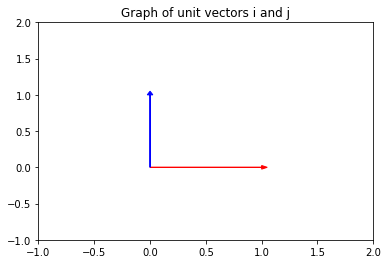

In [25]:
# Axis Bounds
plt.xlim(-1,2)          
plt.ylim(-1,2)

# Unit Vectors
i_hat = [1,0]
j_hat = [0,1]

# PLot Vectors
plt.arrow(0, 0, i_hat[0], i_hat[1], head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, j_hat[0], j_hat[1], head_width=.05, head_length=0.05, color ='blue')
plt.title("Graph of unit vectors i and j")
plt.show()

Orthogonal vectors are right-angled vectors

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [31]:
a = np.array([-5, 3, 7])

b = np.array([6, -8, 2])

In [32]:
np.dot(a, b)

-40

They're not orthogonal as the dot product is not equal to zero

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [33]:
c = np.array([2, -15, 6, 20])

(np.linalg.norm(c))**2

665.0

In [34]:
np.dot(c, c)

665

In [37]:
np.matmul(c.T, c)

665

All add up to the same value. Makes sense because each element is multiplied by itself in all scenarios

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [38]:
f = np.array([4, 12, 11, 9, 2])

In [39]:
np.linalg.norm(f)

19.131126469708992

In [41]:
(f / np.linalg.norm(f)).round(3)

array([0.209, 0.627, 0.575, 0.47 , 0.105])

\begin{align}
\hat{f} = \begin{bmatrix} \frac{4}{19.13} & \frac{12}{19.13} & \frac{11}{19.13} & \frac{9}{19.13} & \frac{2}{19.13}\end{bmatrix}
\end{align}

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

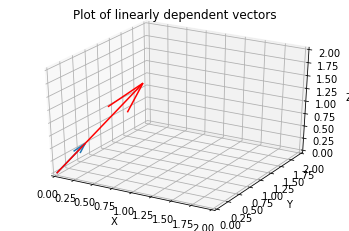

In [47]:
# Plotting linearly dependent vectors
from mpl_toolkits.mplot3d import Axes3D

# Create and plot p, q
p = [.2, .3, .5]
q = [.6, .9, 1.5]
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.quiver(0, 0, 0, .6, .9, 1.5, color="red")
ax.quiver(0, 0, 0, .2, .3, .5)
ax.set_xlim([0,2])
ax.set_ylim([0,2])
ax.set_zlim([0,2])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Plot of linearly dependent vectors")
plt.show()

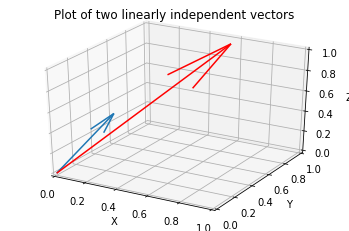

In [48]:
# Plotting linearly independent vectors

p = [.2, .3, .5]
q = [.6, .9, 1]
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.quiver(0, 0, 0, .2, .3, .5)
ax.quiver(0, 0, 0, .6, .9, 1, color="red")
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_zlim([0,1])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Plot of two linearly independent vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

Vector h is a scalar product of g so the span of g and h is 1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [51]:
l = np.array([1, 2, 3])
m = np.array([-1, 0, 7])
n = np.array([4, 8, 2])

np.linalg.matrix_rank([l,
                       m,
                       n])

3

Span of 3. No linearly dependent vectors among l, m, and n

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


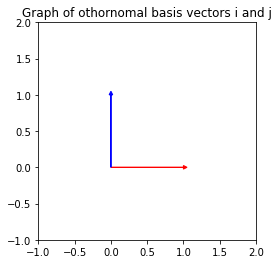

In [53]:
# Axis Bounds
plt.xlim(-1,2)          
plt.ylim(-1,2)

plt.axes().set_aspect("equal")

# Unit Vectors
i_hat = [1,0]
j_hat = [0,1]

# PLot Vectors
plt.arrow(0, 0, i_hat[0], i_hat[1], head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, j_hat[0], j_hat[1], head_width=.05, head_length=0.05, color ='blue')
plt.title("Graph of othornomal basis vectors i and j")
plt.show()

## 6.2 What does it mean to form a basis?

A set of linearly independent vectors that span the given vector space. So any two linearly independent vectors form a basis for the space R2, any three linearly independent vectors form a basis for the space R3, and so on.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [54]:
P = np.array([[1, 2, 3],
              [-1, 0, 7],
              [4, 8, 2]])

np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

Dimension of the vector space spanned by the matrix's columns. Matching the rank to the number of columns tells us if there were any redundancies

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [55]:
# Initialize vectors
v = np.array([1, 3])
w = np.array([-1, 2])

In [57]:
# Use formula ((w.v)/v.v)v
((np.dot(w, v)) / np.dot(v, v))

0.5

0.5 is the scalar to multiply v by to get projection of w on v

In [58]:
# Actual vector:
proj = v * 0.5
proj

array([0.5, 1.5])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


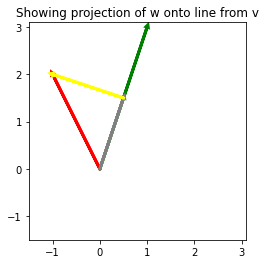

In [63]:
# Axis Bounds
plt.xlim(-1.5, 3.1)          
plt.ylim(-1.5, 3.1)

# Show orthogonal vector from L to w
orth_proj = w - proj

# Set axes to be equal
plt.axes().set_aspect('equal')

# Plot vectors
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(proj[0], proj[1], orth_proj[0], orth_proj[1], linewidth=3, head_width=.05, head_length=0.05, color = 'yellow')

plt.title("Showing projection of w onto line from v")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

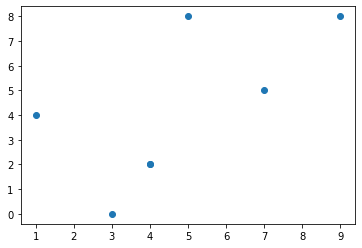

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()